# Commot for Far & Close 500 

In [1]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [13]:
#Reading the results from the commot analysis (done in commot_VISTA_L1_1_L1_2_L4_1) -> 

In [2]:
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/"

TU01plusLB_chuvio_L1_1_dis500 = sc.read_h5ad(f"{path}TU01plusLB_chuvio_L1_1_dis500.h5ad")
TU01plusLB_chuvio_L1_2_dis500 = sc.read_h5ad(f"{path}TU01plusLB_chuvio_L1_2_dis500.h5ad")
TU01plusLB_chuvio_L2_1_dis500 = sc.read_h5ad(f"{path}TU01plusLB_chuvio_L2_1_dis500.h5ad")
TU01plusLB_chuvio_L3_1_dis500 = sc.read_h5ad(f"{path}TU01plusLB_chuvio_L3_1_dis500.h5ad")
TU01plusLB_chuvio_L4_1_dis500 = sc.read_h5ad(f"{path}TU01plusLB_chuvio_L4_1_dis500.h5ad")

TU_MINUS01plusLB_chuvio_L1_1_dis500 = sc.read_h5ad(f"{path}TU_MINUS01plusLB_chuvio_L1_1_dis500.h5ad")
TU_MINUS01plusLB_chuvio_L1_2_dis500 = sc.read_h5ad(f"{path}TU_MINUS01plusLB_chuvio_L1_2_dis500.h5ad")
TU_MINUS01plusLB_chuvio_L2_1_dis500 = sc.read_h5ad(f"{path}TU_MINUS01plusLB_chuvio_L2_1_dis500.h5ad")
TU_MINUS01plusLB_chuvio_L3_1_dis500 = sc.read_h5ad(f"{path}TU_MINUS01plusLB_chuvio_L3_1_dis500.h5ad")
TU_MINUS01plusLB_chuvio_L4_1_dis500 = sc.read_h5ad(f"{path}TU_MINUS01plusLB_chuvio_L4_1_dis500.h5ad")


In [5]:
andata = pd.read_csv("/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/rctd/Level3/chuvio_L1_1_labels.csv")

In [6]:
andata

,Unnamed: 0,x
0,L1_1_aaaadbga-1,DC_2
1,L1_1_aaaajnma-1,Endothelia_vascular
2,L1_1_aaadecno-1,Pericyte
3,L1_1_aaafkiae-1,Endothelia_vascular
4,L1_1_aaahijio-1,Pericyte
...,...,...
71182,L1_1_oielkile-1,Endothelia_vascular
71183,L1_1_oieofjmb-1,Fibroblast
71184,L1_1_oieokhmm-1,Endothelia_vascular
71185,L1_1_oifafdfc-1,Tu_L1


In [3]:
TU01plusLB_chuvio_L1_1_dis500

AnnData object with n_obs × n_vars = 585 × 313
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident'
    uns: 'X_name', 'commot-cellchat-info', 'singler_annotation_colors'
    obsm: 'PCA', 'TSNE', 'UMAP', 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial'
    layers: 'counts', 'logcounts'
    obsp: 'commot-cellchat-APRIL', 'commot-cellchat-AREG-EGFR', 'commot-cellchat-AREG-EGFR_ERBB2', 'commot-cellchat-BAFF', 'commot-cellchat-CCL', 'commot-cellchat-CCL19-CCR7', 'commot-cellchat-CCL2-CCR2', 'commot-cellcha

#### OUT checking run time for commot

In [5]:
#Took about 6 and a half hours to run on all 10 samples (only around a few 100 cells for each sample) 

In [4]:
import os
import time

# Path to the file/directory
path = f"{path}TU_MINUS01plusLB_chuvio_L4_1_dis500.h5ad"

# Both the variables would contain time
# elapsed since EPOCH in float
ti_c = os.path.getctime(path)
ti_m = os.path.getmtime(path)

# Converting the time in seconds to a timestamp
c_ti = time.ctime(ti_c)
m_ti = time.ctime(ti_m)

print(f"The file located at the path {path} \
was created at {c_ti} and was "
      f"last modified at {m_ti}")

The file located at the path /work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/Commot/data/TU_MINUS01plusLB_chuvio_L4_1_dis500.h5ad was created at Wed May  1 03:25:37 2024 and was last modified at Wed May  1 03:25:37 2024


#### Analysing commot results 

In [ ]:
#Create a plot for the presence of the gene pathways in the data set. 
#Select one to plot out
#Compare it with the normal plot of the gene... Maybe in scapny ? 
#Create a geen plot for the gene expression (what type ??) 
#Read the Commot paper and make an explainer slide. 

In [21]:
list_TU01plusLB_chuvio_L1_1 = list(TU01plusLB_chuvio_L1_1_dis500.obsp.keys())
list_TU01plusLB_chuvio_L1_2 = list(TU01plusLB_chuvio_L1_2_dis500.obsp.keys())
list_TU01plusLB_chuvio_L2_1 = list(TU01plusLB_chuvio_L2_1_dis500.obsp.keys())
list_TU01plusLB_chuvio_L3_1 = list(TU01plusLB_chuvio_L3_1_dis500.obsp.keys())
list_TU01plusLB_chuvio_L4_1 = list(TU01plusLB_chuvio_L4_1_dis500.obsp.keys())

list_TU_MINUS01plusLB_chuvio_L1_1 = list(TU_MINUS01plusLB_chuvio_L1_1_dis500.obsp.keys())
list_TU_MINUS01plusLB_chuvio_L1_2 = list(TU_MINUS01plusLB_chuvio_L1_2_dis500.obsp.keys())
list_TU_MINUS01plusLB_chuvio_L2_1 = list(TU_MINUS01plusLB_chuvio_L2_1_dis500.obsp.keys())
list_TU_MINUS01plusLB_chuvio_L3_1 = list(TU_MINUS01plusLB_chuvio_L3_1_dis500.obsp.keys())
list_TU_MINUS01plusLB_chuvio_L4_1 = list(TU_MINUS01plusLB_chuvio_L4_1_dis500.obsp.keys())

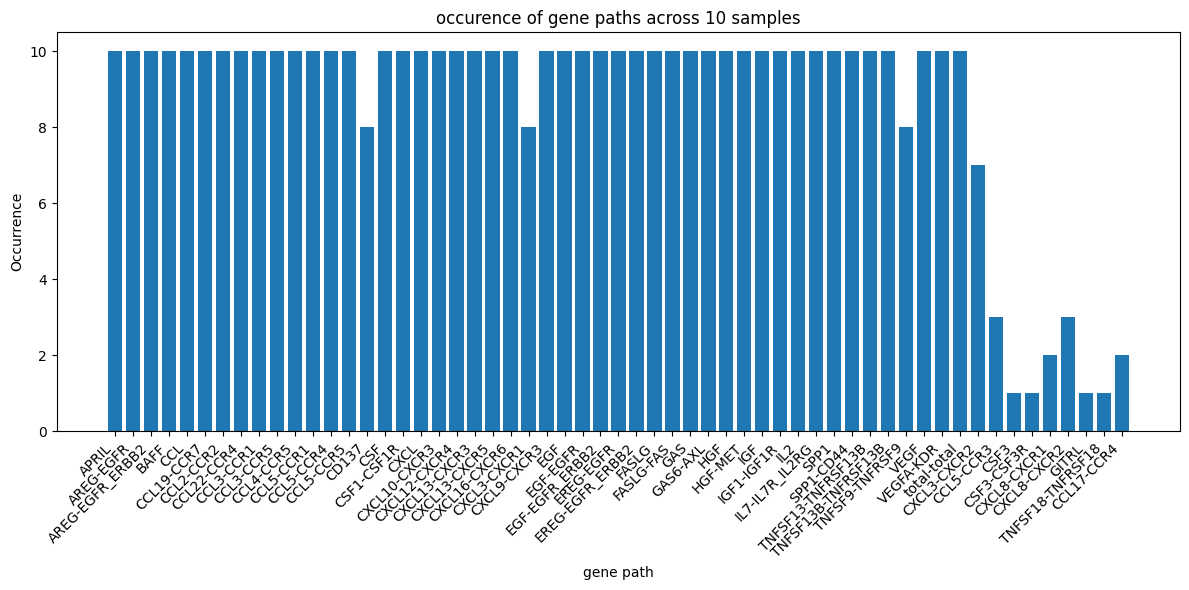

In [29]:
import matplotlib.pyplot as plt

# Define the lists
lists_TU01 = [list_TU01plusLB_chuvio_L1_1, list_TU01plusLB_chuvio_L1_2, list_TU01plusLB_chuvio_L2_1, list_TU01plusLB_chuvio_L3_1, list_TU01plusLB_chuvio_L4_1]
lists_MINTU01 = [list_TU_MINUS01plusLB_chuvio_L1_1, list_TU_MINUS01plusLB_chuvio_L1_2, list_TU_MINUS01plusLB_chuvio_L2_1, list_TU_MINUS01plusLB_chuvio_L3_1, list_TU_MINUS01plusLB_chuvio_L4_1]
lists = lists_TU01 + lists_MINTU01


# Count occurrences of each string
occurrences = {}
for lst in lists:
    for item in lst:
        # Remove the first 16 characters from each label
        label = item[16:]
        occurrences[label] = occurrences.get(label, 0) + 1

# Plot the occurrences
plt.figure(figsize=(12, 6))  # Adjust the size of the figure
plt.bar(occurrences.keys(), occurrences.values())
plt.xlabel('gene path')
plt.ylabel('Occurrence')
plt.title('occurence of gene paths across 10 samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [40]:
# Get the names of the variables in the 'lists' variable
variable_names = [var_name for var_name in locals() if locals()[var_name] in lists]

# Convert the variable names to a string
variable_names_as_string = str(variable_names)

# Print the string representation
print(variable_names_as_string)


KeyError: '__name__'

In [53]:
lists_as_string = ["close_chuvio_L1_1", 
                   "close_chuvio_L1_2", 
                   "close_chuvio_L2_1", 
                   "close_chuvio_L3_1",
                   "close_chuvio_L4_1", 
                   "far_chuvio_L1_1",
                   "far_chuvio_L1_2",
                   "far_chuvio_L2_1",
                   "far_chuvio_L3_1",
                   "far_chuvio_L4_1",  
]

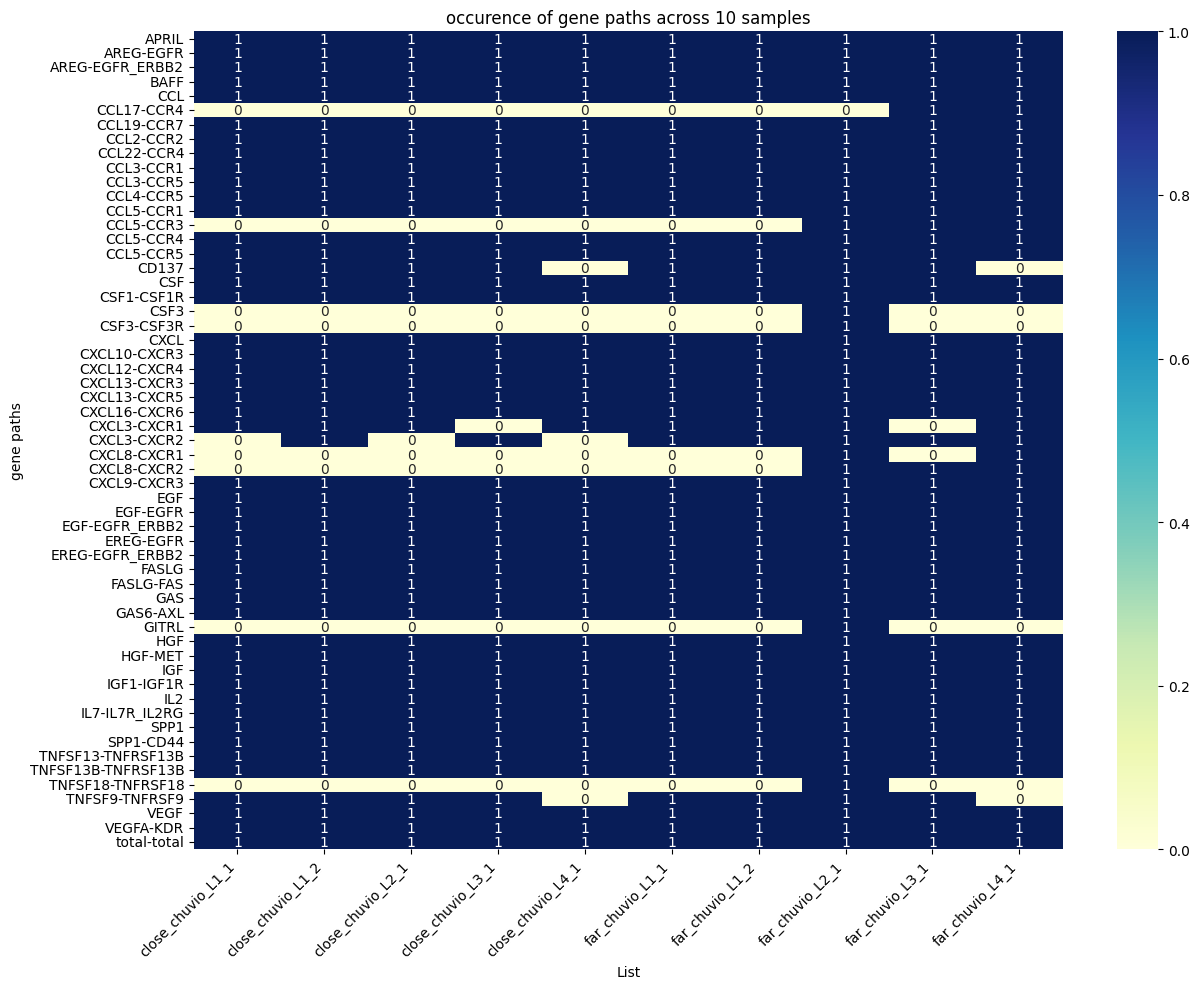

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the lists
lists_TU01 = [list_TU01plusLB_chuvio_L1_1, list_TU01plusLB_chuvio_L1_2, list_TU01plusLB_chuvio_L2_1, list_TU01plusLB_chuvio_L3_1, list_TU01plusLB_chuvio_L4_1]
lists_MINTU01 = [list_TU_MINUS01plusLB_chuvio_L1_1, list_TU_MINUS01plusLB_chuvio_L1_2, list_TU_MINUS01plusLB_chuvio_L2_1, list_TU_MINUS01plusLB_chuvio_L3_1, list_TU_MINUS01plusLB_chuvio_L4_1]
lists = lists_TU01 + lists_MINTU01

# Count occurrences of each string in each list
occurrences = {}
for i, lst in enumerate(lists, start=1):
    for item in lst:
        # Remove the first 16 characters from each label
        label = item[16:]
        occurrences[(label, f'List{i}')] = occurrences.get((label, f'List{i}'), 0) + 1

# Convert occurrences to a matrix
matrix = []
row_labels = sorted(set([item[0] for item in occurrences.keys()]))
col_labels = [f'List{i+1}' for i in range(len(lists))]

for label in row_labels:
    row = []
    for lst in lists:
        count = occurrences.get((label, f'List{lists.index(lst) + 1}'), 0)
        row.append(count)
    matrix.append(row)

# Create a heatmap
plt.figure(figsize=(13, 10))  # Adjust the size of the figure
sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=lists_as_string, yticklabels=row_labels)
plt.xlabel("List")
plt.ylabel("gene paths")
plt.title("occurence of gene paths across 10 samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [11]:
len(TU01plusLB_chuvio_L1_1_dis500.obsp)

48

In [48]:
ct.tl.communication_direction(TU_MINUS01plusLB_chuvio_L1_1_dis500, database_name='cellchat', pathway_name='EGF-EGFR', k=5)

In [46]:
TU01plusLB_chuvio_L1_1_dis500

AnnData object with n_obs × n_vars = 585 × 313
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident'
    uns: 'X_name', 'commot-cellchat-info', 'singler_annotation_colors'
    obsm: 'PCA', 'TSNE', 'UMAP', 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial', 'commot_sender_vf-cellchat-EGF-EGFR', 'commot_receiver_vf-cellchat-EGF-EGFR'
    layers: 'counts', 'logcounts'
    obsp: 'commot-cellchat-APRIL', 'commot-cellchat-AREG-EGFR', 'commot-cellchat-AREG-EGFR_ERBB2', 'commot-cellchat-BAFF', 'commot-cellchat-CC

<Axes: >

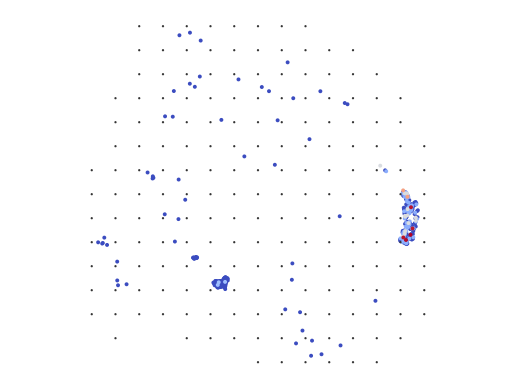

In [49]:
ct.pl.plot_cell_communication(TU_MINUS01plusLB_chuvio_L1_1_dis500, database_name='cellchat', pathway_name='EGF-EGFR', plot_method='grid', background_legend=False,
    scale=0.00009, ndsize=8, grid_density=0.3, normalize_v = True, normalize_v_quantile=0.995)

In [ ]:
chuvio_L1_1.obs['leiden'] = adata.obs['leiden']